### Identify Customer Segments k-Means - Work in Progress
- Data Cleaning + EDA

In [36]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

# import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn import metrics 
from scipy.spatial.distance import cdist

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance

### Data Cleaning

In [2]:
data = pd.read_csv('/Users/jennihawk/Documents/Data Science3/Clustering Project/Online_Retail.csv', encoding='latin1', parse_dates=["InvoiceDate"]) 

In [3]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
data.shape

(541909, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Date EDA 
- year, month, day as separate columns

In [46]:
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Day']= data['InvoiceDate'].dt.day
#data['is_leap_year'] = data['InvoiceDate'].dt.is_leap_year

In [47]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1


In [76]:
#data.Year.unique()

In [75]:
#data.Month.unique()

In [48]:
data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [49]:
data.Country.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [50]:
data.Country.nunique()

38

In [51]:
data.InvoiceNo.nunique()

25900

In [52]:
data.Description.nunique()

4223

In [53]:
data.StockCode.nunique()

4070

In [54]:
data.CustomerID.nunique()

4372

#### Review Customer ID Nulls 

In [55]:
check_null = data[data['CustomerID'].isnull()]

In [79]:
check_null

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,2010,12,1
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2010,12,1
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2010,12,1
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,2010,12,1
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,2010,12,1
...,...,...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom,2011,12,9
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom,2011,12,9
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom,2011,12,9
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom,2011,12,9


#### What countries the nulls come from

In [57]:
# see what countries the nulls come from
check_null.Country.value_counts()

United Kingdom    133600
EIRE                 711
Hong Kong            288
Unspecified          202
Switzerland          125
France                66
Israel                47
Portugal              39
Bahrain                2
Name: Country, dtype: int64

In [58]:
#drop nulls
data_clean = data.dropna()

In [59]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Year         406829 non-null  int64         
 9   Month        406829 non-null  int64         
 10  Day          406829 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 37.2+ MB


#### Check for negative values in Quantity column and Unit Price column

In [60]:
# mask
filt1 = data_clean['Quantity'] < 0
# pass mask to dataframe. Selects only true rows.
data_clean[filt1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2010,12,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010,12,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010,12,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,12,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,12,1
...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011,12,9
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011,12,9
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011,12,9
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011,12,9


#### Assume for this use case that negative values should be positive values. Turn negative vals into positive vals.

In [61]:
data_clean['Quantity'] = data_clean['Quantity'].abs()

/var/folders/_0/21d2kw097h912yp8tr3nkrsm0000gn/T/ipykernel_29956/1238295681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Quantity'] = data_clean['Quantity'].abs()


In [62]:
#data_clean[filt1]

In [63]:
data_clean.shape

(406829, 11)

### Data Transformation

In [64]:
# Calculate total sales
data_clean['Sales'] = data_clean['Quantity'] * data_clean['UnitPrice']

/var/folders/_0/21d2kw097h912yp8tr3nkrsm0000gn/T/ipykernel_29956/1520195918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Sales'] = data_clean['Quantity'] * data_clean['UnitPrice']


### Identify Business Buyer vs Retail Buyer: Look at distribution of quantity
- Box plot
- Scatter plot
- Standard Deviation

In [65]:
data_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34


#### Explore quantity outliers
- box plot
- scatter plot w/sales
- using zscore / standard deviation
- https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

In [66]:
data_clean.describe()

,Quantity,UnitPrice,CustomerID,Year,Month,Day,Sales
count,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000
mean,13.412279,3.460471,15287.690570,2010.934002,7.605947,15.036128,23.407255
std,248.624170,69.315162,1713.600303,0.248279,3.418942,8.653730,427.437730
min,1.000000,0.000000,12346.000000,2010.000000,1.000000,1.000000,0.000000
25%,2.000000,1.250000,13953.000000,2011.000000,5.000000,7.000000,4.680000
50%,5.000000,1.950000,15152.000000,2011.000000,8.000000,15.000000,11.800000
75%,12.000000,3.750000,16791.000000,2011.000000,11.000000,22.000000,19.800000
max,80995.000000,38970.000000,18287.000000,2011.000000,12.000000,31.000000,168469.600000


<AxesSubplot: >

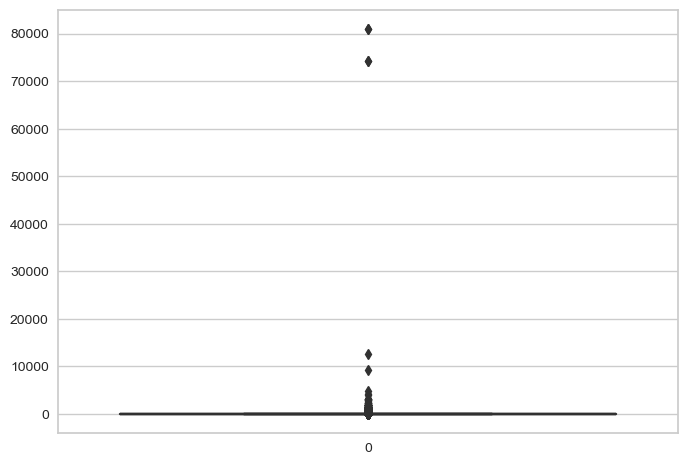

In [67]:
sns.boxplot(data_clean['Quantity'])

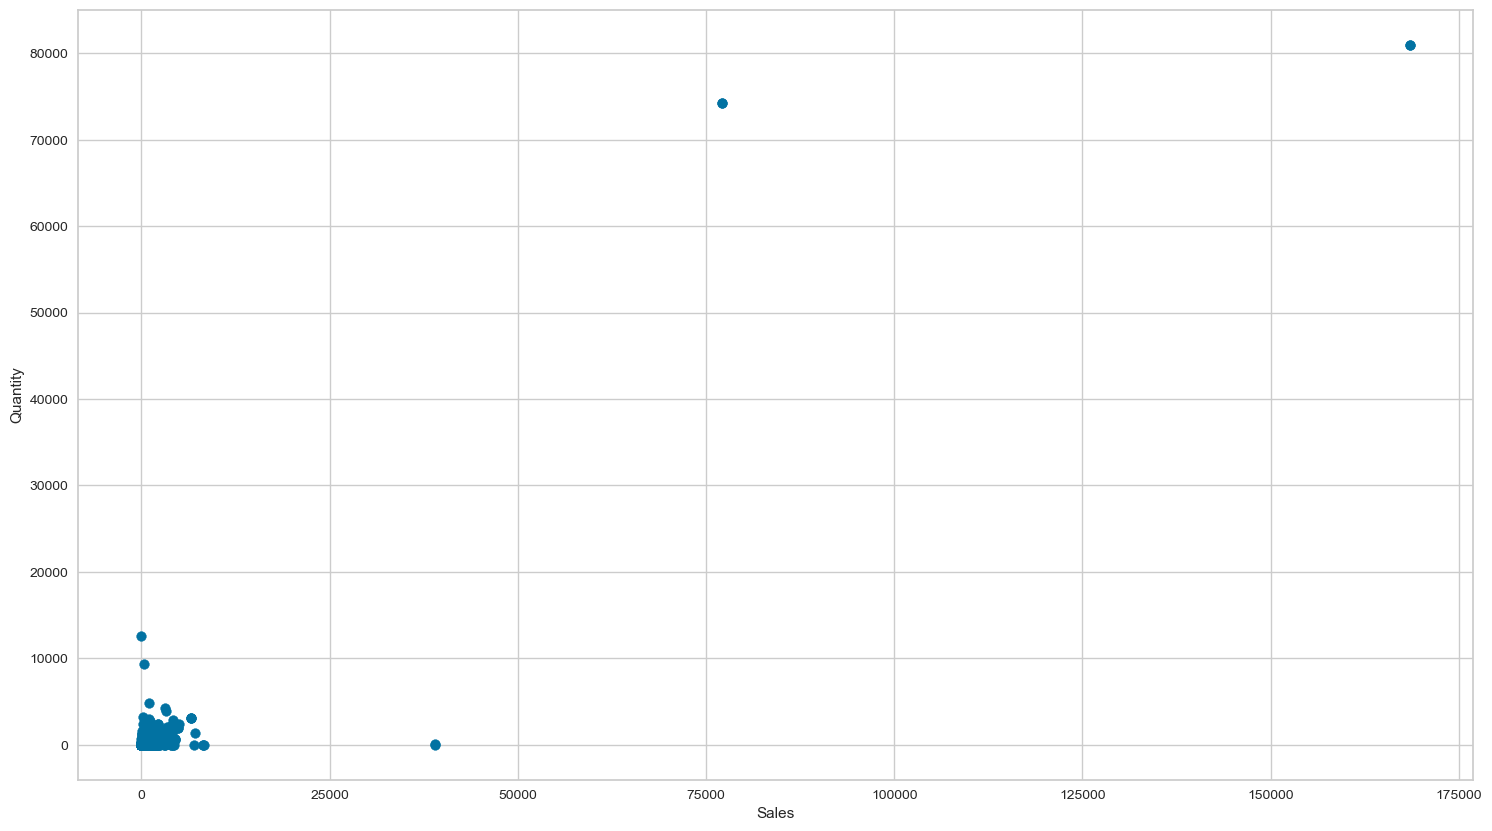

In [68]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(data_clean['Sales'], data_clean['Quantity'])
 
# x-axis label
ax.set_xlabel('Sales')
 
# y-axis label
ax.set_ylabel('Quantity')
plt.show()

#### Using z-score / standard deviation to determine outliers

In [70]:
z = np.abs(stats.zscore(data_clean['Quantity']))
print(z)

0         0.029813
1         0.029813
2         0.021769
3         0.029813
4         0.029813
            ...   
541904    0.005680
541905    0.029813
541906    0.037858
541907    0.037858
541908    0.041880
Name: Quantity, Length: 406829, dtype: float64


#### z-score Define outlier threshold value
- generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach)

In [71]:
threshold = 3
# Position of the outlier
print(np.where(z > 3))
# Outlier’s Index

(array([  3102,   3645,   3740,   3741,   4286,  10938,  10939,  10946,
        10947,  12517,  13220,  13329,  16891,  22229,  25239,  26017,
        33073,  33074,  33075,  33076,  33645,  33646,  33647,  33707,
        38120,  38125,  39034,  48181,  51157,  51269,  52241,  52244,
        54994,  54995,  54996,  55892,  57188,  57838,  59194,  63331,
        65021,  72532,  72534,  74087,  76098,  80085,  82325,  82328,
        82329,  84449,  84450,  88623,  95244,  96422,  97537,  97539,
        97580,  97586,  98258, 103771, 107572, 107574, 112369, 112370,
       112371, 112372, 112435, 112436, 112438, 112439, 114611, 114612,
       114614, 114615, 116166, 117910, 119052, 119054, 124818, 128379,
       130369, 131075, 131861, 139134, 143113, 143752, 143835, 143836,
       145200, 146796, 148552, 158463, 158485, 159832, 160719, 165208,
       175794, 175805, 175808, 180125, 180448, 181630, 193523, 197565,
       199360, 201660, 203416, 203431, 205538, 208115, 209077, 209079,
     

#### zscore Code:  automatically detects  and exclude outliers - pandas code:
https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe

In [82]:
#import numpy as np
#from scipy import stats
#df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [42]:
#specify a column for the zscore, df[0] for example, and remove .all(axis=1)
#df[(np.abs(stats.zscore(df[0])) < 3)]

In [80]:
#data_clean[data_clean.Quantity > 70000]

In [81]:
#data_clean[data_clean.Sales > 1000]

#### Group customer ID (to get one ID per row) and get average sales for each customer

In [ ]:
#avg_percust_sales = percust_per_invoice.groupby("CustomerID")["Sales"].mean().reset_index()

In [ ]:
#avg_percust_sales.rename(columns = {'Sales':'Avg Sales'}, inplace = True)

In [ ]:
#avg_percust_sales